## 1. load data


In [561]:
import pandas as pd
player = pd.read_csv('all_players_stats_cleaned.csv')
injury = pd.read_csv('injury_cleaned.csv')

In [562]:
player.head()

,Name,Team,Year,GP,GS,QS,W,L,SV,HLD,...,ER,HR,BB,K,K/9,P/S,WAR,WHIP,ERA,Position
0,Zac Gallen,ARI,2023,34,34,20,17,9,0,0,...,81,22,47,220,9.4,95.5,4.4,1.12,3.47,SP
1,Merrill Kelly,ARI,2023,30,30,18,12,8,0,0,...,65,20,69,187,9.5,93.4,3.9,1.19,3.29,SP
2,Ryne Nelson,ARI,2023,29,27,7,8,8,0,0,...,85,24,46,96,6.0,84.5,0.0,1.42,5.31,SP
3,Brandon Pfaadt,ARI,2023,19,18,3,3,9,0,0,...,61,22,26,94,8.8,85.2,-0.4,1.41,5.72,SP
4,Tommy Henry,ARI,2023,17,16,6,5,4,0,0,...,41,12,35,64,6.5,86.3,1.1,1.36,4.15,SP


In [563]:
player.shape[0]

15744

In [564]:
injury.rename(columns={'Notes': 'Injury'}, inplace=True)
injury.head()

,Year,Name,Injury
0,2003,Carlos Hernandez,1
1,2003,A.J. Burnett,1
2,2003,Justin Miller,1
3,2003,Ramon Hernandez,1
4,2003,Mike Piazza,1


In [565]:
injury.shape[0]

13244

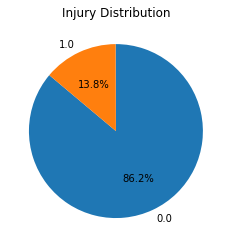

In [566]:
import matplotlib.pyplot as plt
injury_counts = merged_df['Injury'].value_counts()
plt.pie(injury_counts, labels=injury_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Injury Distribution')
plt.show()


<AxesSubplot:xlabel='Year', ylabel='Density'>

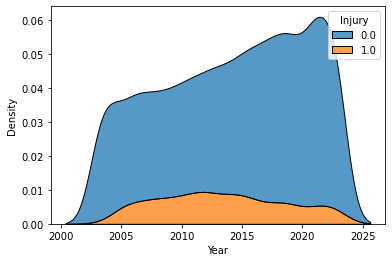

In [567]:
import seaborn as sns
sns.kdeplot(data=merged_df, x="Year", hue="Injury", multiple="stack")

## 2. Merge performance stats and injury stats

In [568]:
# merge the two dataset together
merged_df = pd.merge(player, injury, on=['Name', 'Year'], how='left')
merged_df['Injury'].fillna(0, inplace=True)
merged_df

,Name,Team,Year,GP,GS,QS,W,L,SV,HLD,...,HR,BB,K,K/9,P/S,WAR,WHIP,ERA,Position,Injury
0,Zac Gallen,ARI,2023,34,34,20,17,9,0,0,...,22,47,220,9.4,95.5,4.4,1.12,3.47,SP,0.0
1,Merrill Kelly,ARI,2023,30,30,18,12,8,0,0,...,20,69,187,9.5,93.4,3.9,1.19,3.29,SP,0.0
2,Ryne Nelson,ARI,2023,29,27,7,8,8,0,0,...,24,46,96,6.0,84.5,0.0,1.42,5.31,SP,0.0
3,Brandon Pfaadt,ARI,2023,19,18,3,3,9,0,0,...,22,26,94,8.8,85.2,-0.4,1.41,5.72,SP,0.0
4,Tommy Henry,ARI,2023,17,16,6,5,4,0,0,...,12,35,64,6.5,86.3,1.1,1.36,4.15,SP,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16316,Jesse English,WSH,2010,7,0,0,0,0,0,0,...,0,2,4,5.1,0.0,0.1,1.71,3.86,RP,0.0
16317,Matt Chico,WSH,2010,1,1,0,0,0,0,0,...,0,0,3,5.4,79.0,0.1,1.20,3.60,SP,0.0
16318,Joe Bisenius,WSH,2010,5,0,0,0,0,0,0,...,1,6,5,9.6,0.0,-0.2,2.57,9.64,RP,0.0
16319,Garrett Mock,WSH,2010,1,1,0,0,0,0,0,...,2,5,3,8.1,84.0,0.0,2.70,5.40,SP,0.0


In [569]:
merged_df.shape[0]

16321

## 3.Remove Duplicates & replace Non-numerica placeholders with NaN & replace infinite value with  a large finite value

### please note that there are more rows [16321] than [15744] which indicates there are duplicates matches from injury table being merged into player table

In [570]:
injury = injury.drop_duplicates(subset=['Name', 'Year'])
merged_df = pd.merge(player, injury, on=['Name', 'Year'], how='left')
merged_df['Injury'].fillna(0, inplace=True)
merged_df.shape

(15744, 23)

In [571]:
import numpy as np
merged_df.replace('---', np.nan, inplace=True)

In [572]:
merged_df['ERA'] = pd.to_numeric(merged_df['ERA'], errors='coerce', downcast='float')

In [573]:
merged_df['WHIP'].replace(np.inf, np.nan, inplace=True)

In [574]:
print(merged_df.columns)

Index(['Name', 'Team', 'Year', 'GP', 'GS', 'QS', 'W', 'L', 'SV', 'HLD', 'IP',
       'H', 'ER', 'HR', 'BB', 'K', 'K/9', 'P/S', 'WAR', 'WHIP', 'ERA',
       'Position', 'Injury'],
      dtype='object')


In [575]:
missing_values_count_per_column = merged_df.isna().sum()
print(missing_values_count_per_column)

Name         0
Team         0
Year         0
GP           0
GS           0
QS           0
W            0
L            0
SV           0
HLD          0
IP           0
H            0
ER           0
HR           0
BB           0
K            0
K/9          0
P/S          0
WAR          0
WHIP        19
ERA          4
Position     0
Injury       0
dtype: int64


In [576]:
merged_df.dropna(inplace=True)

In [577]:
missing_values_count_per_column = merged_df.isna().sum()
print(missing_values_count_per_column)

Name        0
Team        0
Year        0
GP          0
GS          0
QS          0
W           0
L           0
SV          0
HLD         0
IP          0
H           0
ER          0
HR          0
BB          0
K           0
K/9         0
P/S         0
WAR         0
WHIP        0
ERA         0
Position    0
Injury      0
dtype: int64


## 4. Remove irrelavant information such as Name, Team

In [578]:
merged_df=merged_df.drop(["Name","Team"],axis=1)

In [579]:
merged_df

,Year,GP,GS,QS,W,L,SV,HLD,IP,H,...,HR,BB,K,K/9,P/S,WAR,WHIP,ERA,Position,Injury
0,2023,34,34,20,17,9,0,0,210.0,188,...,22,47,220,9.4,95.5,4.4,1.12,3.47,SP,0.0
1,2023,30,30,18,12,8,0,0,177.2,143,...,20,69,187,9.5,93.4,3.9,1.19,3.29,SP,0.0
2,2023,29,27,7,8,8,0,0,144.0,159,...,24,46,96,6.0,84.5,0.0,1.42,5.31,SP,0.0
3,2023,19,18,3,3,9,0,0,96.0,109,...,22,26,94,8.8,85.2,-0.4,1.41,5.72,SP,0.0
4,2023,17,16,6,5,4,0,0,89.0,86,...,12,35,64,6.5,86.3,1.1,1.36,4.15,SP,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15739,2010,7,0,0,0,0,0,0,7.0,10,...,0,2,4,5.1,0.0,0.1,1.71,3.86,RP,0.0
15740,2010,1,1,0,0,0,0,0,5.0,6,...,0,0,3,5.4,79.0,0.1,1.20,3.60,SP,0.0
15741,2010,5,0,0,0,0,0,0,4.2,6,...,1,6,5,9.6,0.0,-0.2,2.57,9.64,RP,0.0
15742,2010,1,1,0,0,0,0,0,3.1,4,...,2,5,3,8.1,84.0,0.0,2.70,5.40,SP,0.0


## 4. Convert categorical varibales

In [580]:
merged_df = pd.get_dummies(merged_df, columns=['Position'])

In [581]:
print(merged_df.columns)

Index(['Year', 'GP', 'GS', 'QS', 'W', 'L', 'SV', 'HLD', 'IP', 'H', 'ER', 'HR',
       'BB', 'K', 'K/9', 'P/S', 'WAR', 'WHIP', 'ERA', 'Injury', 'Position_B',
       'Position_C', 'Position_CF', 'Position_DH', 'Position_IVSP',
       'Position_LF', 'Position_OF', 'Position_P', 'Position_RF',
       'Position_RP', 'Position_SP', 'Position_SS', 'Position_UN'],
      dtype='object')


## 5. Split

In [582]:
train = merged_df[(merged_df['Year'] <= 2015)

validation = merged_df[(merged_df['Year'] >= 2016) & (merged_df['Year'] <= 2019)]

test = merged_df[merged_df['Year'] >= 2019]



SyntaxError: invalid syntax (2172684160.py, line 3)

In [583]:
x_train = train.drop(['Injury',"Year"], axis=1)
x_vali = validation.drop(['Injury',"Year"], axis=1)
x_test = test.drop(['Injury',"Year"], axis=1)

# Creating target variable sets
y_train = train['Injury']
y_vali = validation['Injury']
y_test = test['Injury']

# Check for missing values 
x_train.isnull().sum()

GP               0
GS               0
QS               0
W                0
L                0
SV               0
HLD              0
IP               0
H                0
ER               0
HR               0
BB               0
K                0
K/9              0
P/S              0
WAR              0
WHIP             0
ERA              0
Position_B       0
Position_C       0
Position_CF      0
Position_DH      0
Position_IVSP    0
Position_LF      0
Position_OF      0
Position_P       0
Position_RF      0
Position_RP      0
Position_SP      0
Position_SS      0
Position_UN      0
dtype: int64

In [584]:
y_train.isnull().sum()

0

In [585]:
from collections import Counter
print('Original dataset shape', Counter(y_train))

Original dataset shape Counter({0.0: 4114, 1.0: 703})


In [586]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train, y_train = smote.fit_resample(x_train, y_train.ravel())
print('Original dataset shape', Counter(y_train))

Original dataset shape Counter({0.0: 4114, 1.0: 4114})


## 6. Model building

In [587]:
from xgboost import XGBClassifier
import xgboost as xgb
xgb_model = XGBClassifier().fit(x_train, y_train)
predictions = xgb_model.predict(x_vali)
actuals = y_vali

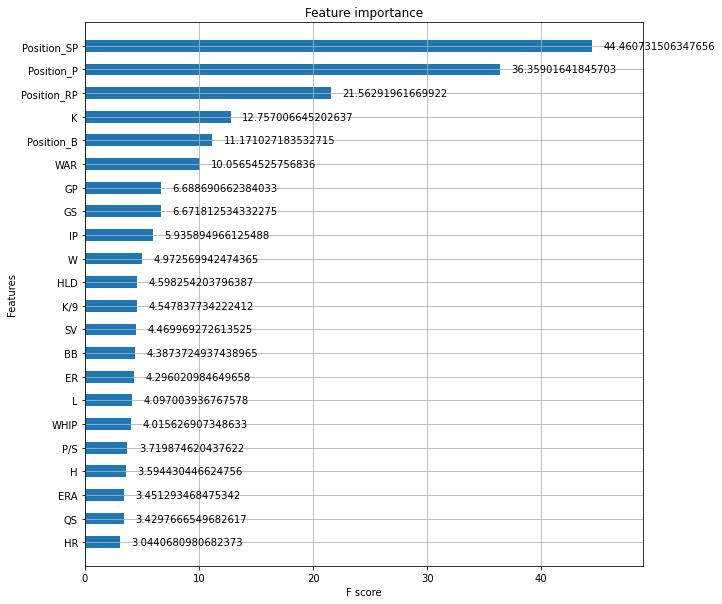

In [588]:
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(xgb_model, max_num_features=50, height=0.5, ax=ax,importance_type='gain')
plt.show()

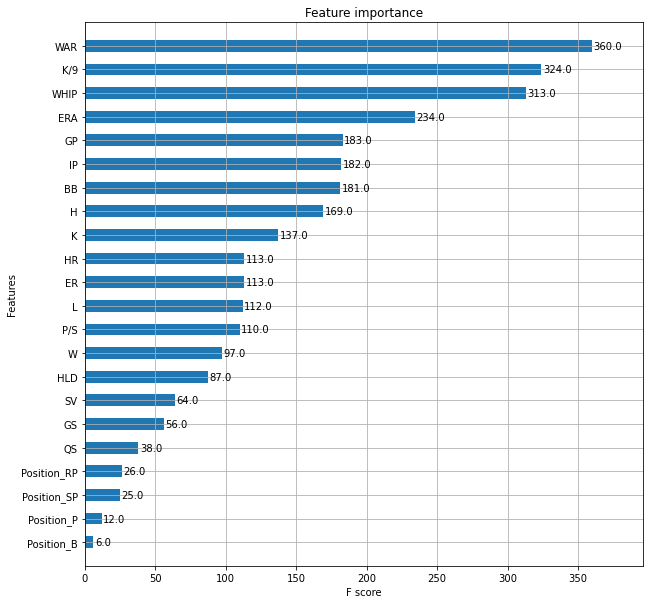

In [589]:
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(xgb_model, max_num_features=50, height=0.5, ax=ax,importance_type='weight')
plt.show()

In [590]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

from sklearn.ensemble import RandomForestClassifier
randomforest_model = RandomForestClassifier()
randomforest_model.fit(x_train, y_train)

predictions = randomforest_model.predict(x_vali)

actuals = y_vali

print(confusion_matrix(actuals, predictions))
print("accuracy_score:", accuracy_score(actuals, predictions))
print("Precision_score:", precision_score(actuals, predictions))
print("F1_score:", f1_score(actuals, predictions))
print("Roc_auc", roc_auc_score(actuals, randomforest_model.predict_proba(x_vali)[:, 1]))

[[703  79]
 [ 90  20]]
accuracy_score: 0.8105381165919282
Precision_score: 0.20202020202020202
F1_score: 0.1913875598086124
Roc_auc 0.6150720762613346


In [591]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()
LR_model.fit(x_train, y_train)

predictions = LR_model.predict(x_vali)

actuals = y_vali

print(confusion_matrix(actuals, predictions))
print("accuracy_score:", accuracy_score(actuals, predictions))
print("Precision_score:", precision_score(actuals, predictions))
print("F1_score:", f1_score(actuals, predictions))
print("Roc_auc", roc_auc_score(actuals, LR_model.predict_proba(x_vali)[:, 1]))

[[516 266]
 [ 47  63]]
accuracy_score: 0.649103139013453
Precision_score: 0.19148936170212766
F1_score: 0.2870159453302961
Roc_auc 0.63552662171588


C:\Users\potat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [592]:
from xgboost import XGBClassifier
import xgboost as xgb

xgb_model = XGBClassifier().fit(x_train, y_train)

predictions = xgb_model.predict(x_vali)

actuals = y_vali

print(confusion_matrix(actuals, predictions))
print("accuracy_score:", accuracy_score(actuals, predictions))
print("Precision_score:", precision_score(actuals, predictions))
print("F1_score:", f1_score(actuals, predictions))
print("Roc_auc", roc_auc_score(actuals, xgb_model.predict_proba(x_vali)[:, 1]))

[[696  86]
 [ 84  26]]
accuracy_score: 0.8094170403587444
Precision_score: 0.23214285714285715
F1_score: 0.2342342342342342
Roc_auc 0.6075098814229248


In [593]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()
mlp_model = mlp.fit(x_train, y_train)
predictions = mlp_model.predict(x_vali)

actuals = y_vali

print(confusion_matrix(actuals, predictions))
print("accuracy_score:", accuracy_score(actuals, predictions))
print("Precision_score:", precision_score(actuals, predictions))
print("F1_score:", f1_score(actuals, predictions))
print("Roc_auc", roc_auc_score(actuals, mlp_model.predict_proba(x_vali)[:, 1]))

[[505 277]
 [ 56  54]]
accuracy_score: 0.6266816143497758
Precision_score: 0.16314199395770393
F1_score: 0.24489795918367344
Roc_auc 0.6163682864450128


In [594]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC, SVC
svm=SVC(probability=True)

svm_model = svm.fit(x_train, y_train)
predictions = svm_model.predict(x_vali)

actuals = y_vali

print(confusion_matrix(actuals, predictions))
print("accuracy_score:", accuracy_score(actuals, predictions))
print("Precision_score:", precision_score(actuals, predictions))
print("F1_score:", f1_score(actuals, predictions))
print("Roc_auc", roc_auc_score(actuals, svm_model.predict_proba(x_vali)[:, 1]))

[[502 280]
 [ 46  64]]
accuracy_score: 0.6345291479820628
Precision_score: 0.18604651162790697
F1_score: 0.2819383259911894
Roc_auc 0.6493722390141827
